#  Loan Defaulter Prediction 

## Supervised Learning Hands-on session

# Loading Dataset using pandas

In [ ]:
#for handling dataset
import numpy as np

#additional array-based functionality
import pandas as pd

#visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning functions
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#for manipulating dates and times
import datetime as dt


: 

In [2]:
#Load the dataset into memory from secondary memory to primary memory
data = pd.read_csv("LoanStats Dataset_30052021.csv", encoding="Latin-1", low_memory=False)
print("Dataset loaded in memory...")

#set the maximum column display limit to 50
pd.set_option('display.max_columns', 50)

Dataset loaded in memory...


In [3]:
data.shape

(36396, 41)

# Row display operations

In [4]:
#displaying profiles of any given index
i=0
print("Details of "+str(i)+"th profile from the dataset :\n\nAttributes\n")
print(data.iloc[i])

Details of 0th profile from the dataset :

Attributes

Loan ID                                                                                87023
Amount Requested                                                                        7500
Amount Funded By Investors                                                              7500
Interest Rate                                                                         13.75%
Loan Length                                                                        36 months
Application Date                                                                  2007-06-07
Application Expiration Date                                                       2007-06-21
Issued Date                                                                       2007-06-27
CREDIT Grade                                                                              E2
Loan Title                                                                Consolidation Loan
Loan Purpose   

In [5]:
#display first 5 records 

print("Display the starting 5 profiles from the dataset :")
data.head()

Display the starting 5 profiles from the dataset :


,Loan ID,Amount Requested,Amount Funded By Investors,Interest Rate,Loan Length,Application Date,Application Expiration Date,Issued Date,CREDIT Grade,Loan Title,Loan Purpose,Loan Description,Monthly PAYMENT,Status,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal Funded by Investors,Payments To Date (Funded by investors),Remaining Principal,Payments To Date,Screen Name,City,State,Home Ownership,Monthly Income,FICO Range,Earliest CREDIT Line,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquent Amount,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Education,Employment Length,Code
0,87023,7500.0,7500.0,13.75%,36 months,2007-06-07,2007-06-21,2007-06-27,E2,Consolidation Loan,debt_consolidation,"I plan to consolidate over $7,000 of debt: a c...",255.43,Fully Paid,7500.0,14.29%,0.0,9194.98,0.0,9194.98,Kingtrite,Attleboro,MA,OWN,1833.33,660-678,2003-10-27,7.0,8.0,4175.0,51.5%,0.0,0.0,0.0,1.0,11.0,0.0,0.0,NaN,< 1 year,NaN
1,90376,5000.0,5000.0,7.43%,36 months,2007-06-12,2007-06-26,2007-07-02,A2,JAL Loan,other,NaN,155.38,Fully Paid,5000.0,3.72%,0.0,5174.16,0.0,5174.16,Laguna,Rockville,MD,MORTGAGE,16666.67,780+,1988-11-19,17.0,26.0,85607.0,0.7%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN
2,90395,5000.0,5000.0,8.07%,36 months,2007-06-12,2007-06-26,2007-07-02,A4,MBA Loan Consolidation,debt_consolidation,NaN,156.84,Fully Paid,5000.0,2.3%,0.0,5272.08,0.0,5272.08,MGDesousa,Framingham,MA,MORTGAGE,8333.33,714-749,1998-10-28,11.0,20.0,9698.0,19.4%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN
3,90665,8500.0,8500.0,10.28%,36 months,2007-06-13,2007-06-27,2007-07-03,C1,Retiring credit card debt,credit_card,The rate of interest and fees incurred by carr...,275.38,Fully Paid,8500.0,6.4%,0.0,9912.49,0.0,9912.49,Radiothermal,Greensboro,NC,RENT,1500.00,679-713,1986-12-30,6.0,9.0,8847.0,26.9%,1.0,0.0,0.0,1.0,5.0,0.0,0.0,NaN,3 years,NaN
4,92187,2500.0,2500.0,8.07%,36 months,2007-06-15,2007-06-29,2007-07-05,A4,Home Improvement,home_improvement,Our current gutter system on our home is old a...,78.42,Fully Paid,2500.0,11.33%,0.0,2822.72,0.0,2822.72,PMJ7671,Lakewood,CO,MORTGAGE,9166.67,750-779,1990-11-11,13.0,40.0,7274.0,13.1%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4 years,NaN


# Illustrating Filter on the data

In [6]:
#display selected rows from the dataset
print("Selecting particular rows from the dataset : ")
data.loc[(data['Amount Requested'] > 7000)].head(3)
# data.loc[(data['CREDIT Grade'] == 'A2') | (data['CREDIT Grade'] == 'B2')].head(3)

Selecting particular rows from the dataset : 


,Loan ID,Amount Requested,Amount Funded By Investors,Interest Rate,Loan Length,Application Date,Application Expiration Date,Issued Date,CREDIT Grade,Loan Title,Loan Purpose,Loan Description,Monthly PAYMENT,Status,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal Funded by Investors,Payments To Date (Funded by investors),Remaining Principal,Payments To Date,Screen Name,City,State,Home Ownership,Monthly Income,FICO Range,Earliest CREDIT Line,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquent Amount,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Education,Employment Length,Code
0,87023,7500.0,7500.0,13.75%,36 months,2007-06-07,2007-06-21,2007-06-27,E2,Consolidation Loan,debt_consolidation,"I plan to consolidate over $7,000 of debt: a c...",255.43,Fully Paid,7500.0,14.29%,0.0,9194.98,0.0,9194.98,Kingtrite,Attleboro,MA,OWN,1833.33,660-678,2003-10-27,7.0,8.0,4175.0,51.5%,0.0,0.0,0.0,1.0,11.0,0.0,0.0,NaN,< 1 year,NaN
3,90665,8500.0,8500.0,10.28%,36 months,2007-06-13,2007-06-27,2007-07-03,C1,Retiring credit card debt,credit_card,The rate of interest and fees incurred by carr...,275.38,Fully Paid,8500.0,6.4%,0.0,9912.49,0.0,9912.49,Radiothermal,Greensboro,NC,RENT,1500.00,679-713,1986-12-30,6.0,9.0,8847.0,26.9%,1.0,0.0,0.0,1.0,5.0,0.0,0.0,NaN,3 years,NaN
19,101579,10000.0,10000.0,10.28%,36 months,2007-06-27,2007-07-11,2007-07-17,C1,Web Design Business Expansion Loan,small_business,Seven months ago I decided to drop everything ...,323.98,Fully Paid,10000.0,10.7%,0.0,11662.13,0.0,11662.13,WebDev,Fort Collins,CO,RENT,2281.33,679-713,2003-09-17,4.0,4.0,3534.0,54.4%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,< 1 year,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36396 entries, 0 to 36395
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Loan ID                                  36396 non-null  object 
 1   Amount Requested                         36395 non-null  float64
 2   Amount Funded By Investors               36395 non-null  float64
 3   Interest Rate                            36395 non-null  object 
 4   Loan Length                              36395 non-null  object 
 5   Application Date                         36395 non-null  object 
 6   Application Expiration Date              36395 non-null  object 
 7   Issued Date                              36219 non-null  object 
 8   CREDIT Grade                             36395 non-null  object 
 9   Loan Title                               36382 non-null  object 
 10  Loan Purpose                             36395

In [8]:
data.isna().sum()

Loan ID                                        0
Amount Requested                               1
Amount Funded By Investors                     1
Interest Rate                                  1
Loan Length                                    1
Application Date                               1
Application Expiration Date                    1
Issued Date                                  177
CREDIT Grade                                   1
Loan Title                                    14
Loan Purpose                                   1
Loan Description                           10544
Monthly PAYMENT                                1
Status                                         1
Total Amount Funded                            1
Debt-To-Income Ratio                           1
Remaining Principal Funded by Investors        1
Payments To Date (Funded by investors)         1
Remaining Principal                            1
 Payments To Date                              1
Screen Name         

### Dropping columns where most of the records are null

In [9]:
# # most of the records in Months Since Last Delinquency and Education are null. Hence drop the columns.
data.drop(['Months Since Last Delinquency'], axis = 1,inplace=True)

data.drop(['Education'], axis = 1,inplace=True)

### Dropping columns where most of the records are 0

In [10]:
print('\nNumber of unique values in Accounts Now Delinquent column:')
print(data['Accounts Now Delinquent'].value_counts())

# most of the records contain Accounts Now Delinquent are 0. Hence drop the column.
data.drop(['Accounts Now Delinquent'], axis = 1,inplace=True)


Number of unique values in Accounts Now Delinquent column:
0.0    36362
1.0        4
Name: Accounts Now Delinquent, dtype: int64


In [11]:
print('\nNumber of unique values in Delinquent Amount column:')
print(data['Delinquent Amount'].value_counts())

# most of the records contain Delinquent Amount = 0. Hence drop the column.
data.drop(['Delinquent Amount'], axis = 1,inplace=True)


Number of unique values in Delinquent Amount column:
0.0       36364
6053.0        1
27.0          1
Name: Delinquent Amount, dtype: int64


In [12]:
print('\nNumber of unique values in Delinquencies (Last 2 yrs) column:')
print(data['Delinquencies (Last 2 yrs)'].value_counts())

# most of the records contain 'Delinquencies (Last 2 yrs)' = 0. Hence drop the column.
data.drop(['Delinquencies (Last 2 yrs)'], axis = 1,inplace=True)


Number of unique values in Delinquencies (Last 2 yrs) column:
0.0     32199
1.0      3159
2.0       680
3.0       219
4.0        58
5.0        26
6.0        12
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: Delinquencies (Last 2 yrs), dtype: int64


In [13]:
data.shape

(36396, 36)

# Selecting the required rows

## Transforming "Status" values

In [14]:
#Display the unique values in the attribute of Loan status

print("Display unique values from the attribute \"Status\":\n")
i=1
for item in data.Status.unique():
    print(i,item)
    i+=1

Display unique values from the attribute "Status":

1 Fully Paid
2 Charged Off
3 Late (31-120 days)
4 Performing Payment Plan
5 Default
6 In Grace Period
7 Current
8 Late (16-30 days)
9 Issued
10 In Review
11 nan
12 Does not meet the current credit policy  Status: Fully Paid
13 Does not meet the current credit policy  Status: Performing Payment Plan
14 Does not meet the current credit policy  Status: Charged Off
15 Does not meet the current credit policy  Status: Late (31-120 days)
16 Does not meet the current credit policy  Status: In Grace Period
17 Does not meet the current credit policy  Status: Late (16-30 days)
18 Does not meet the current credit policy  Status: Current
19 Does not meet the current credit policy  Status: Default


In [15]:
#remove all other records except the Fully paid, Current, Late (31-120 days), In Grace Period, Default and Charged Off records
data_with_loanstatus_sliced = data[(data['Status']=="Fully Paid") | (data['Status']=="Charged Off") | (data['Status']=='Does not meet the current credit policy  Status: Fully Paid') | (data['Status']=='Does not meet the current credit policy  Status: Charged Off') 
                                   | (data['Status']=="Late (31-120 days)") | (data['Status']=="Default") | (data['Status']=="In Grace Period") | (data['Status']=="Current") |(data['Status']=='Does not meet the current credit policy  Status: Late (31-120 days)') 
                                   |  (data['Status']=="Does not meet the current credit policy  Status: In Grace Period")|(data['Status']=="Does not meet the current credit policy  Status: Current") |(data['Status']=="Does not meet the current credit policy  Status: Default")]


#map Fully paid  to 0, Current to 1, Late (31-120 days) to 2, In Grace Period to 3, Default to 4 and Charged Off to 5
di = {"Fully Paid":0, 'Does not meet the current credit policy  Status: Fully Paid':0, 'Current':1,'Does not meet the current credit policy  Status: Current': 1, 'Late (31-120 days)':2,  'Does not meet the current credit policy  Status: Late (31-120 days)':2, 
      'Does not meet the current credit policy  Status: In Grace Period': 3, 'In Grace Period':3,'Default': 4, 'Does not meet the current credit policy  Status: Default':4 ,'Does not meet the current credit policy  Status: Charged Off':5, "Charged Off":5,} 

data= data_with_loanstatus_sliced.replace({"Status": di})

In [16]:
#print the new unique values of the attribute

print("Unique values in \"Status\" attibute : \n",data['Status'].value_counts())
# Fully paid  is 0 ,  Current is 1, Late (31-120 days) is 2, In Grace Period is 3, Default is 4 and Charged Off is 5

print("\nCurrent shape of dataset :",data.shape)

Unique values in "Status" attibute : 
 1    25345
0     5684
5     1604
2      421
3      242
4       39
Name: Status, dtype: int64

Current shape of dataset : (33335, 36)


In [17]:
# print("Values of the status column :")
# print(data['Status'])

# Attribute selection

In [18]:
#list of attributes ignored for our analysis
dcolumns = ['Loan ID','Amount Requested', 'Amount Funded By Investors','Loan Title','Loan Purpose',
            'Loan Description','Remaining Principal Funded by Investors',
            'Payments To Date (Funded by investors)',
            'Screen Name','City','Code' ,'Application Date', 'Application Expiration Date', 'Issued Date','Earliest CREDIT Line',
           'Inquiries in the Last 6 Months','Public Records On File','Months Since Last Record',
           'CREDIT Grade','State','Home Ownership']

#attribute removal
data = data.drop(dcolumns, axis=1)

#display the remainig attributes
print("Remaining columns after selection : \n")
for item in data.columns.values:
    print(item)

print('\n')
print(data.shape)

Remaining columns after selection : 

Interest Rate
Loan Length
Monthly PAYMENT
Status
Total Amount Funded
Debt-To-Income Ratio
Remaining Principal 
 Payments To Date
Monthly Income
FICO Range
Open CREDIT Lines
Total CREDIT Lines
Revolving CREDIT Balance
Revolving Line Utilization
Employment Length


(33335, 15)


# Preprocessing Continuous values

## Preprocessing Interest rate column

### Converting string values to numeric values

In [19]:
#display sample values from the attribute - interest rate

# print("Sample values in the attribute - Interest Rate\n")
# print(data['Interest Rate'])

#remove the '%' character from the string values of the attribute
data['Interest Rate'] = data['Interest Rate'].replace({'%':''}, regex = True)

#convert the attribute values to float
data['Interest Rate'] = data['Interest Rate'].apply(lambda x:float(x))

#display the new values of attribute
# print("Sample values in the attribute - Interest Rate, after processing\n")
# print(data['Interest Rate'])

print('\nTotal Null Values in Interest Rate column:')
print(data['Interest Rate'].isna().sum())

print('\nMinimum and Maximum values for Interest Rate column:')
print(data['Interest Rate'].min(), data['Interest Rate'].max())


Total Null Values in Interest Rate column:
0

Minimum and Maximum values for Interest Rate column:
5.42 24.59


In [20]:
#Discretizing the Interest rate column
cut_label_Interest_Rate = ['1', '2', '3', '4']
cut_bins = [5, 10, 15, 20, 25]
data['Interest Rate'] = pd.cut(data['Interest Rate'], bins=cut_bins, labels=cut_label_Interest_Rate)

data['Interest Rate'].value_counts()

2    16648
1     9660
3     6492
4      535
Name: Interest Rate, dtype: int64

In [21]:
print(data.shape)

(33335, 15)


## Preprocessing Debt-To-Income Ratio column

In [22]:
#processing of similar attributes with % at the end of the values

data['Debt-To-Income Ratio'] = data['Debt-To-Income Ratio'].replace({'%':''}, regex = True)
data['Debt-To-Income Ratio'] = data['Debt-To-Income Ratio'].apply(lambda x:float(x))

print('\nTotal Null Values in Debt-To-Income Ratio column:')
print(data['Debt-To-Income Ratio'].isna().sum())

print('\nMinimum and Maximum values for Debt-To-Income Ratio column:')
print(data['Debt-To-Income Ratio'].min(), data['Debt-To-Income Ratio'].max())


Total Null Values in Debt-To-Income Ratio column:
0

Minimum and Maximum values for Debt-To-Income Ratio column:
0.0 29.99


In [23]:
#Discretizing the Debt-To-Income Ratio column
cut_label_Debt_To_Income_Ratio = ['1', '2', '3', '4', '5', '6']
cut_bins = [-1, 5, 10, 15, 20, 25, 30]
data['Debt-To-Income Ratio'] = pd.cut(data['Debt-To-Income Ratio'], bins=cut_bins, labels=cut_label_Debt_To_Income_Ratio)

data['Debt-To-Income Ratio'].value_counts()

3    8336
4    7496
2    6847
5    5469
1    4677
6     510
Name: Debt-To-Income Ratio, dtype: int64

In [24]:
print(data.shape)

(33335, 15)


## Preprocessing Revolving Line Utilization column

In [25]:
data['Revolving Line Utilization'] = data['Revolving Line Utilization'].replace({'%':''}, regex = True)
data['Revolving Line Utilization'] = data['Revolving Line Utilization'].apply(lambda x:float(x))

print('\nTotal Null Values in Revolving Line Utilization column:')
print(data['Revolving Line Utilization'].isna().sum())

print('\nMinimum and Maximum values for Revolving Line Utilization column:')
print(data['Revolving Line Utilization'].min(), data['Revolving Line Utilization'].max())


Total Null Values in Revolving Line Utilization column:
84

Minimum and Maximum values for Revolving Line Utilization column:
0.0 119.0


In [26]:
#Dropping the rows where Revolving Line Utilization is null
data.dropna(subset = ['Revolving Line Utilization'], inplace=True)

In [27]:
#Discretizing the Revolving Line Utilization column
cut_label_Revolving_Line_Utilization = ['1', '2', '3', '4','5','6','7','8','9','10','11','12']
cut_bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
data['Revolving Line Utilization'] = pd.cut(data['Revolving Line Utilization'], bins=cut_bins, labels=cut_label_Revolving_Line_Utilization)

data['Revolving Line Utilization'].value_counts()

1     4001
5     3656
6     3589
4     3537
7     3401
3     3269
8     3237
9     2969
2     2966
10    2599
11      26
12       1
Name: Revolving Line Utilization, dtype: int64

In [28]:
print(data.shape)

(33251, 15)


## Preprocessing Loan Length column

### Removing the ' months' part from the values

In [29]:
#display sample values from the attribute
print("Sample values in the attribute - Loan Length\n")
print(data['Loan Length'])

#remove the ' month' part from the string values
data['Loan Length'] = data['Loan Length'].replace({' months':''}, regex = True)

#convert the strings into integer type
data['Loan Length'] = data['Loan Length'].apply(lambda x:int(x))

#display the processed values
# print("Sample values in the attribute - Loan Length, after processing")
# print(data['Loan Length'])

print('\nTotal Null Values in Loan Length column:')
print(data['Loan Length'].isna().sum())

print('\nMinimum and Maximum values for Loan Length column:')
print(data['Loan Length'].min(), data['Loan Length'].max())

Sample values in the attribute - Loan Length

0        36 months
1        36 months
2        36 months
3        36 months
4        36 months
           ...    
36391    60 months
36392    36 months
36393    60 months
36394    60 months
36395    60 months
Name: Loan Length, Length: 33251, dtype: object

Total Null Values in Loan Length column:
0

Minimum and Maximum values for Loan Length column:
36 60


In [30]:
data['Loan Length'].value_counts()

36    25296
60     7955
Name: Loan Length, dtype: int64

In [31]:
#Discretizing the Loan Length column
cut_label_Loan_Length = ['3', '5']
cut_bins = [0, 36, 60]
data['Loan Length'] = pd.cut(data['Loan Length'], bins=cut_bins, labels=cut_label_Loan_Length)

data['Loan Length'].value_counts()

3    25296
5     7955
Name: Loan Length, dtype: int64

In [32]:
print(data.shape)

(33251, 15)


## Preprocessing Total Amount Funded column

In [33]:
# print("Sample values in the attribute - Total Amount Funded\n")
# print(data['Total Amount Funded'])

print('\nTotal Null Values in Total Amount Funded column:')
print(data['Total Amount Funded'].isna().sum())

print('\nMinimum and Maximum values for Total Amount Funded column:')
print(data['Total Amount Funded'].min(), data['Total Amount Funded'].max())


Total Null Values in Total Amount Funded column:
0

Minimum and Maximum values for Total Amount Funded column:
500.0 35000.0


In [34]:
data['Total Amount Funded'].value_counts()

10000.0    2390
5000.0     1875
12000.0    1687
6000.0     1650
15000.0    1468
           ... 
5825.0        1
21150.0       1
23275.0       1
27200.0       1
725.0         1
Name: Total Amount Funded, Length: 976, dtype: int64

In [35]:
#Discretizing the Total Amount Funded column
cut_label_Total_Amount_Funded = ['1', '2', '3', '4', '5', '6', '7']
cut_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
data['Total Amount Funded'] = pd.cut(data['Total Amount Funded'], bins=cut_bins, labels=cut_label_Total_Amount_Funded)

data['Total Amount Funded'].value_counts()

2    11474
1     8839
3     6492
4     3617
5     2179
6      331
7      319
Name: Total Amount Funded, dtype: int64

In [36]:
print(data.shape)

(33251, 15)


## Preprocessing Monthly PAYMENT column

In [37]:
# print("Sample values in the attribute - Monthly PAYMENT\n")
# print(data['Monthly PAYMENT'])

print('\nTotal Null Values in Monthly PAYMENT column:')
print(data['Monthly PAYMENT'].isna().sum())

print('\nMinimum and Maximum values for Monthly PAYMENT column:')
print(data['Monthly PAYMENT'].min(), data['Monthly PAYMENT'].max())


Total Null Values in Monthly PAYMENT column:
0

Minimum and Maximum values for Monthly PAYMENT column:
15.67 1305.19


In [38]:
data['Monthly PAYMENT'].value_counts()

311.02    53
180.96    52
311.11    48
150.80    46
372.12    45
          ..
376.70     1
893.69     1
88.96      1
287.78     1
134.38     1
Name: Monthly PAYMENT, Length: 13770, dtype: int64

In [39]:
#Discretizing the Monthly PAYMENT column
cut_label_Monthly_PAYMENT = ['1', '2', '3', '4', '5', '6', '7']
cut_bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]

data['Monthly PAYMENT'] = pd.cut(data['Monthly PAYMENT'], bins=cut_bins, labels=cut_label_Monthly_PAYMENT)

data['Monthly PAYMENT'].value_counts()

2    12530
1    12029
3     5356
4     2120
5     1100
6       85
7       31
Name: Monthly PAYMENT, dtype: int64

In [40]:
print(data.shape)

(33251, 15)


## Preprocessing Remaining Principal column

In [41]:
# print("Sample values in the attribute - Remaining Principal\n")
# print(data['Remaining Principal '])

print('\nTotal Null Values in Remaining Principal column:')
print(data['Remaining Principal '].isna().sum())

print('\nMinimum and Maximum values for Remaining Principal column:')
print(data['Remaining Principal '].min(), data['Remaining Principal '].max())


Total Null Values in Remaining Principal column:
0

Minimum and Maximum values for Remaining Principal column:
-0.04 35000.0


In [42]:
data['Remaining Principal '].value_counts()

 0.00        5250
 0.01         179
-0.01         140
 10000.00      31
 20000.00      26
             ... 
 962.96         1
 6688.36        1
 4241.19        1
 13835.84       1
 3253.11        1
Name: Remaining Principal , Length: 26718, dtype: int64

In [43]:
#Discretizing the Remaining Principal column
cut_label_Remaining_Principal  = ['0', '1', '2', '3', '4', '5', '6', '7']
cut_bins = [-1, 0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]

data['Remaining Principal '] = pd.cut(data['Remaining Principal '], bins=cut_bins, labels=cut_label_Remaining_Principal)

data['Remaining Principal '].value_counts()

1    10959
2     8864
0     5394
3     4475
4     1974
5      988
6      300
7      297
Name: Remaining Principal , dtype: int64

In [44]:
print(data.shape)

(33251, 15)


## Preprocessing Payments To Date column

In [45]:
# print("Sample values in the attribute -  Payments To Date\n")
# print(data[' Payments To Date'])

print('Total Null Values in  Payments To Date column:')
print(data[' Payments To Date'].isna().sum())

print('\nMinimum and Maximum values for  Payments To Date column:')
print(data[' Payments To Date'].min(), data[' Payments To Date'].max())

Total Null Values in  Payments To Date column:
0

Minimum and Maximum values for  Payments To Date column:
0.0 35621.98


In [46]:
data[' Payments To Date'].value_counts()

0.00        516
398.40        6
199.20        6
6888.00       6
364.80        6
           ... 
813.28        1
10002.55      1
1482.84       1
1536.48       1
1765.68       1
Name:  Payments To Date, Length: 31125, dtype: int64

In [47]:
#Discretizing the Payments To Date column
cut_label_Payments_To_Date  = ['1', '2', '3', '4', '5', '6']
cut_bins = [-1, 6000, 12000, 18000, 24000, 30000, 36000]

data[' Payments To Date'] = pd.cut(data[' Payments To Date'], bins=cut_bins, labels=cut_label_Payments_To_Date)

data[' Payments To Date'].value_counts()

1    24958
2     5363
3     1970
4      647
5      285
6       28
Name:  Payments To Date, dtype: int64

In [48]:
print(data.shape)

(33251, 15)


## Preprocessing Monthly Income column

In [49]:
# print("Sample values in the attribute - Monthly Income\n")
# print(data['Monthly Income'])

print('Total Null Values in Monthly Income column:')
print(data['Monthly Income'].isna().sum())

print('\nMinimum and Maximum values for  Monthly Income column:')
print(data['Monthly Income'].min(), data['Monthly Income'].max())

Total Null Values in Monthly Income column:
0

Minimum and Maximum values for  Monthly Income column:
-0.08 500000.0


In [50]:
data['Monthly Income'].value_counts()

5000.00    1222
4166.67     817
3333.33     694
3750.00     691
2500.00     684
           ... 
8817.00       1
340.00        1
4016.00       1
7104.00       1
7317.08       1
Name: Monthly Income, Length: 4779, dtype: int64

In [51]:
#Discretizing the Monthly Income column
cut_label_Monthly_Income  = ['1', '2', '3', '4', '5','6','7','8','9']
cut_bins = [-1, 1000, 2000, 3000, 4000, 5000, 6000,7000,8000, 500000]

data['Monthly Income'] = pd.cut(data['Monthly Income'], bins=cut_bins, labels=cut_label_Monthly_Income)

data['Monthly Income'].value_counts()

5    5949
4    5694
9    5574
3    4500
6    4060
7    3069
8    2360
2    1794
1     251
Name: Monthly Income, dtype: int64

In [52]:
print(data.shape)

(33251, 15)


## Preprocessing Open CREDIT Lines column

In [53]:
# print("Sample values in the attribute - Open CREDIT Lines\n")
# print(data['Open CREDIT Lines'])

print('Total Null Values in Open CREDIT Lines column:')
print(data['Open CREDIT Lines'].isna().sum())

print('\nMinimum and Maximum values for Open CREDIT Lines column:')
print(data['Open CREDIT Lines'].min(), data['Open CREDIT Lines'].max())

Total Null Values in Open CREDIT Lines column:
0

Minimum and Maximum values for Open CREDIT Lines column:
1.0 47.0


In [54]:
data['Open CREDIT Lines'].value_counts()

6.0     3296
7.0     3256
8.0     3186
9.0     3007
5.0     2714
10.0    2604
11.0    2256
4.0     2051
12.0    1864
13.0    1599
3.0     1325
14.0    1241
15.0    1001
16.0     813
17.0     618
2.0      563
18.0     459
19.0     348
20.0     274
21.0     233
22.0     140
23.0      97
24.0      68
25.0      54
1.0       34
26.0      32
27.0      26
28.0      23
29.0      13
31.0      13
30.0      13
34.0       7
33.0       4
35.0       4
32.0       4
36.0       2
38.0       2
39.0       1
42.0       1
44.0       1
47.0       1
41.0       1
37.0       1
46.0       1
Name: Open CREDIT Lines, dtype: int64

In [55]:
#Discretizing the Open CREDIT Lines column
cut_label_Open_CREDIT_Lines  = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
cut_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

data['Open CREDIT Lines'] = pd.cut(data['Open CREDIT Lines'], bins=cut_bins, labels=cut_label_Open_CREDIT_Lines)

data['Open CREDIT Lines'].value_counts()

2     15349
3      7961
1      6687
4      2512
5       592
6       107
7        32
8         6
9         3
10        2
Name: Open CREDIT Lines, dtype: int64

In [56]:
print(data.shape)

(33251, 15)


## Preprocessing Total CREDIT Lines column

In [57]:
# print("Sample values in the attribute - Total CREDIT Lines\n")
# print(data['Total CREDIT Lines'])

print('Total Null Values in Total CREDIT Lines column:')
print(data['Total CREDIT Lines'].isna().sum())

print('\nMinimum and Maximum values for Total CREDIT Lines column:')
print(data['Total CREDIT Lines'].min(), data['Total CREDIT Lines'].max())

Total Null Values in Total CREDIT Lines column:
0

Minimum and Maximum values for Total CREDIT Lines column:
1.0 90.0


In [58]:
data['Total CREDIT Lines'].value_counts()

20.0    1200
16.0    1186
14.0    1185
17.0    1184
15.0    1184
        ... 
72.0       1
80.0       1
77.0       1
71.0       1
74.0       1
Name: Total CREDIT Lines, Length: 83, dtype: int64

In [59]:
#Discretizing the Total CREDIT Lines column
cut_label_Total_CREDIT_Lines = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
cut_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

data['Total CREDIT Lines'] = pd.cut(data['Total CREDIT Lines'], bins=cut_bins, labels=cut_label_Total_CREDIT_Lines)

data['Total CREDIT Lines'].value_counts()

2    11475
3     9172
1     5369
4     4730
5     1755
6      544
7      189
8       14
9        3
Name: Total CREDIT Lines, dtype: int64

In [60]:
print(data.shape)

(33251, 15)


## Preprocessing Revolving CREDIT Balance column

In [61]:
# print("Sample values in the attribute - Revolving CREDIT Balance\n")
# print(data['Revolving CREDIT Balance'])

print('Total Null Values in Revolving CREDIT Balance column:')
print(data['Revolving CREDIT Balance'].isna().sum())

print('\nMinimum and Maximum values for Revolving CREDIT Balance column:')
print(data['Revolving CREDIT Balance'].min(), data['Revolving CREDIT Balance'].max())

Total Null Values in Revolving CREDIT Balance column:
0

Minimum and Maximum values for Revolving CREDIT Balance column:
0.0 1207359.0


In [62]:
data['Revolving CREDIT Balance'].value_counts()

0.0        885
255.0       14
1.0         12
682.0       11
298.0       11
          ... 
12155.0      1
18557.0      1
9909.0       1
1625.0       1
15738.0      1
Name: Revolving CREDIT Balance, Length: 19564, dtype: int64

In [63]:
#Discretizing the Revolving CREDIT Balance column
cut_label_Revolving_CREDIT_Balance = ['1', '2', '3', '4', '5', '6']
cut_bins = [-1, 10000, 20000, 30000, 40000, 50000, 1300000]

data['Revolving CREDIT Balance'] = pd.cut(data['Revolving CREDIT Balance'], bins=cut_bins, labels=cut_label_Revolving_CREDIT_Balance)

data['Revolving CREDIT Balance'].value_counts()

1    18689
2     7905
3     3146
6     1445
4     1363
5      703
Name: Revolving CREDIT Balance, dtype: int64

In [64]:
print(data.shape)

(33251, 15)


## Preprocessing FICO Range column

In [65]:
#rename the attribute
data.rename(columns = {'FICO Range':'FICO_Range'}, inplace = True)

#print unique values of the attribute
print("Display unique values of the attribute : FICO_Range")
print(data.FICO_Range.unique())

print("\nDisplay total nan values in FICO_Range:")
print(data.FICO_Range.isna().sum())

Display unique values of the attribute : FICO_Range
['660-678' '780+' '714-749' '679-713' '750-779' nan '640-659']

Display total nan values in FICO_Range:
17


In [66]:
# Drop the records where Employment_Length has null value
data.dropna(subset = ['FICO_Range'], inplace=True)

#map the categories of the attributes to numbers
data["FICO_Range"] = data["FICO_Range"].map({"640-659":6,"660-678":5,"679-713":4,"714-749":3,"750-779":2,"780+":1})


#display the processed values
print("\n\nDisplay unique values of the attribute : FICO_Range after filling nan")
print(data['FICO_Range'].value_counts())



Display unique values of the attribute : FICO_Range after filling nan
4    11618
3     9480
5     5292
2     4462
1     1912
6      470
Name: FICO_Range, dtype: int64


In [67]:
print(data.shape)

(33234, 15)


## Preprocessing Employment Length column

In [68]:
#rename the attribute
data.rename(columns = {'Employment Length':'Employment_Length'}, inplace = True)

#display unique values of the attribute
print("Display unique values of attribute : Employment Length\n")
print(data.Employment_Length.unique())

# Number of records where Employment_Length has null value
print("\nTotal Number of records where Employment_Length has null value:")
print(data['Employment_Length'].isna().sum())

# Drop the records where Employment_Length has null value
data.dropna(subset = ['Employment_Length'], inplace=True)

Display unique values of attribute : Employment Length

['< 1 year' '3 years' '4 years' '5 years' '1 year' '2 years' '8 years'
 '7 years' '6 years' '9 years' '10+ years' nan]

Total Number of records where Employment_Length has null value:
778


In [69]:
#map the categories to numbers
data["Employment_Length"] = data["Employment_Length"].map({'< 1 year':1, '3 years':4, '4 years':5, '5 years':6, '1 year':2, '2 years':3, '8 years':9, '7 years':8, '6 years':7, '9 years':10, '10+ years':11})

#display the unique values after processing
print("Display unique values of attribute : Employment Length after processing\n")
print(data['Employment_Length'].value_counts())

Display unique values of attribute : Employment Length after processing

11    7032
1     4202
3     3829
4     3534
2     2909
5     2848
6     2672
7     1730
8     1413
9     1241
10    1046
Name: Employment_Length, dtype: int64


In [70]:
print(data.shape)

(32456, 15)


## Displaying total null values in each column

In [71]:
data.isna().sum()

Interest Rate                 0
Loan Length                   0
Monthly PAYMENT               0
Status                        0
Total Amount Funded           0
Debt-To-Income Ratio          0
Remaining Principal           0
 Payments To Date             0
Monthly Income                0
FICO_Range                    0
Open CREDIT Lines             0
Total CREDIT Lines            0
Revolving CREDIT Balance      0
Revolving Line Utilization    0
Employment_Length             0
dtype: int64

In [72]:
#saving copy of data for analysis
data_copy = data.copy()

# Final shape of the dataset
data.shape

(32456, 15)

# Model Building

In [73]:
# separate some sample profiles/records to test the trained models

samples = data.tail(3246)
print("10% sample profiles copied from the dataset : ")

#delete the records from the dataset
data = data.iloc[:-3246]
print("10% profiles removed from the dataset... ")

10% sample profiles copied from the dataset : 
10% profiles removed from the dataset... 


## Dataset preparation

In [74]:
#save the values into two datasets - input and output


#save the class variable
status = data['Status']

#save the remaining (predictor) attributes
other_att = data.drop(['Status'], axis=1)


In [75]:
status.reset_index(inplace=True,drop=True)
status

0        0
1        0
2        0
3        0
4        0
        ..
29205    1
29206    1
29207    1
29208    1
29209    1
Name: Status, Length: 29210, dtype: int64

# Normalizing the dataset

In [76]:
# #create the scaler
# scaler = MinMaxScaler()

# #fit and transform the dataset values
# trans_others = scaler.fit_transform(other_att)

#create the dataset consisting of the predictor variables
# X = pd.DataFrame(data=trans_others, columns=other_att.columns.values)

#display the values of the model input
X=other_att

In [77]:
X

,Interest Rate,Loan Length,Monthly PAYMENT,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal,Payments To Date,Monthly Income,FICO_Range,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Employment_Length
0,2,3,2,2,3,0,2,2,5,2,1,1,6,1
1,1,3,1,1,1,0,1,9,1,4,3,6,1,1
2,1,3,1,1,1,0,1,9,3,3,2,1,2,1
3,2,3,2,2,2,0,2,2,4,2,1,1,3,4
4,1,3,1,1,3,0,1,9,2,3,4,1,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30288,4,5,4,6,4,6,1,7,4,2,4,2,8,11
30289,1,5,2,3,3,3,1,9,2,4,5,6,5,6
30290,2,5,2,3,5,3,1,3,4,3,2,2,4,7
30291,2,3,3,3,2,3,1,9,4,2,3,1,4,9


# Decision Tree Models' performance on variable test data size

Accuracy of the Decision Tree Classifier at test data- 0.5 :  0.8702499144128722
Accuracy of the Decision Tree Classifier at test data- 0.4 :  0.8745292707976721
Accuracy of the Decision Tree Classifier at test data- 0.3 :  0.874700445053064
Accuracy of the Decision Tree Classifier at test data- 0.2 :  0.8675111263266004
Accuracy of the Decision Tree Classifier at test data- 0.1 :  0.8695652173913043


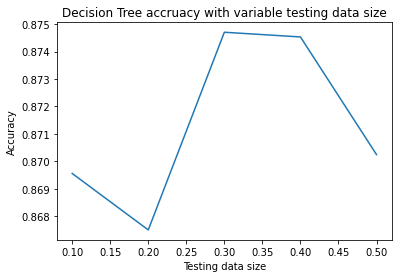

In [78]:
# variable size of the test dataset
test_list=[0.5, 0.4, 0.3, 0.2, 0.1]
acc=[]


#train model on various train/test sets and record the accuracies
for num in test_list:    

    #split the dataset according to the value in the list
    X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=num, random_state=1)

    #create a new model object
    DT = DecisionTreeClassifier(criterion='entropy',random_state=0)

    #train the model on the train data
    DT.fit(X_train,y_train)
    
    #predict the values, test data input
    DTPredict = DT.predict(X_test)

    #evaluate the accuracy of the model
    Accuracy = metrics.accuracy_score(y_test,DTPredict)

    #save the accuracy of the model
    acc.append(Accuracy)

    print("Accuracy of the Decision Tree Classifier at test data-",num,": ",Accuracy)

#plot the graph - accuracy against the test-data size
plt.plot(test_list, acc) 
plt.xlabel('Testing data size') 
plt.ylabel('Accuracy') 
plt.title('Decision Tree accruacy with variable testing data size') 
plt.show() 

In [79]:
# Accuracy of the Decision Tree Classifier at test data- 0.5 :  0.8702499144128722
# Accuracy of the Decision Tree Classifier at test data- 0.4 :  0.8745292707976721
# Accuracy of the Decision Tree Classifier at test data- 0.3 :  0.874700445053064  Maximum Accuracy
# Accuracy of the Decision Tree Classifier at test data- 0.2 :  0.8675111263266004
# Accuracy of the Decision Tree Classifier at test data- 0.1 :  0.8695652173913043

In [80]:
#split the data in the hightest accuracy
X_train, X_test, y_train, y_test = train_test_split(X, status, test_size=0.3, random_state=1) # 70% training and 30% test

In [81]:
#train the model
DT = DecisionTreeClassifier(criterion='entropy',random_state=0)
DT.fit(X_train,y_train)

#make predictions
DTPredict = DT.predict(X_test)

#note the accuracy and ROC score
Accuracy = metrics.accuracy_score(y_test,DTPredict)
print("Accuracy of the Decision Tree Classifier : ",round(Accuracy,2))

Accuracy of the Decision Tree Classifier :  0.87


# Testing sample profiles on the trained models

In [82]:
# Display the sample records
samples

,Interest Rate,Loan Length,Monthly PAYMENT,Status,Total Amount Funded,Debt-To-Income Ratio,Remaining Principal,Payments To Date,Monthly Income,FICO_Range,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Employment_Length
30293,3,3,2,1,2,4,2,1,4,5,2,2,1,10,11
30294,1,3,1,1,1,3,1,1,5,3,3,2,1,4,2
30295,2,3,6,1,7,3,7,1,9,2,5,8,1,2,11
30296,2,3,4,1,4,3,4,1,7,3,3,2,1,1,6
30297,2,3,1,1,1,3,1,1,5,4,2,2,1,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36391,2,5,1,1,1,4,1,1,6,5,2,4,1,1,7
36392,3,3,1,1,1,4,1,1,4,5,1,1,1,9,6
36393,3,5,1,1,1,3,1,1,6,4,2,3,4,8,11
36394,3,5,3,1,4,3,4,1,9,5,2,4,2,9,11


In [83]:
#get the sample output separated
sample_y=samples['Status']

In [84]:
#remove the status attribute from the sample profiles
samples_reduced = samples.drop('Status', axis=1)

#display the remaining attributes
print("Remaining attributes of the sample profiles :")
print(samples_reduced.columns)

Remaining attributes of the sample profiles :
Index(['Interest Rate', 'Loan Length', 'Monthly PAYMENT',
       'Total Amount Funded', 'Debt-To-Income Ratio', 'Remaining Principal ',
       ' Payments To Date', 'Monthly Income', 'FICO_Range',
       'Open CREDIT Lines', 'Total CREDIT Lines', 'Revolving CREDIT Balance',
       'Revolving Line Utilization', 'Employment_Length'],
      dtype='object')


In [85]:
#predicting the status for samples
prediction = DT.predict(samples_reduced)

In [86]:
#total number of counts for each status
sample_y.value_counts()

1    1567
0    1073
5     518
2      54
3      27
4       7
Name: Status, dtype: int64

In [87]:
#total number of counts for each prediction
np.array(np.unique(prediction, return_counts=True)).T

array([[   0, 1058],
       [   1, 1916],
       [   2,   50],
       [   3,   28],
       [   4,    6],
       [   5,  188]], dtype=int64)

In [88]:
# sample_y converted to array
s_y =np.array(sample_y)

#Reshaping the 2 arrays into a 2D array
s_y=s_y.reshape(s_y.shape[0],1)
prediction=prediction.reshape(prediction.shape[0],1)

In [89]:
#Concatenating the true and predicted values and saving it in a new array arr 
arr=np.concatenate((s_y, prediction),axis=1)

# converting array to dataframe
df=pd.DataFrame(arr,columns = ['True Value','Predicted Value'])
# Displaying first 5 true and predicted values side by side
df.head(5)

,True Value,Predicted Value
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [90]:
#Accuracy of the sample predictions
print(metrics.accuracy_score(sample_y,prediction))

0.7698706099815157
